## Transfer Learning Inception V3 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# No of images in segmented folder
import os
import numpy as np
data_path="/content/drive/MyDrive/segmented"
classes = os.listdir(data_path)
cnt=0
# print(classes)
for i in classes:
  source = data_path+'/'+i
  image_list_per_class = os.listdir(source)
  cnt = cnt + len(image_list_per_class)

print(cnt, 'Images found in',len(classes),'Classes')

54307 Images found in 38 Classes


In [ ]:
!pip install tensorflow-gpu

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
def timer(start,end):
  hours, rem = divmod(end-start, 3600)
  minutes, seconds = divmod(rem, 60)
  print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [ ]:
# splitting the dataset int train , test and split sets
import os
import numpy as np
import shutil
import time

start = time.time()
data_path="/content/drive/MyDrive/segmented" 
splitted_data="/content/drive/MyDrive/plantVillageData"
train_ratio=0.6
valid_ratio=0.2
test_ratio=0.2

classes = os.listdir(data_path)
print(classes)
cnt =1
for i in classes:
  class_start=time.time()
  print('Class',cnt,'i.e.,',i,'is splitting')
  os.makedirs(splitted_data +'/train/' + i)
  os.makedirs(splitted_data +'/valid/' + i)
  os.makedirs(splitted_data +'/test/' + i)
  source = data_path+'/'+i
  image_list_per_class = os.listdir(source)
  np.random.shuffle(image_list_per_class)
  train_images, valid_images, test_images = np.split(np.array(image_list_per_class), 
                                                    [int(len(image_list_per_class)*train_ratio),int(len(image_list_per_class)*(train_ratio+valid_ratio))])
  train_FileNames = [source+'/'+ name for name in train_images.tolist()]
  valid_FileNames = [source+'/'+ name for name in valid_images.tolist()]
  test_FileNames = [source+'/' + name for name in test_images.tolist()]
  for name in train_FileNames:
    if name!='/content/drive/MyDrive/segmented/Tomato___Bacterial_spot/Strawberry___Leaf_scorch':
      shutil.copy(name, splitted_data +'/train/' + i)
  for name in valid_FileNames:
    if name!='/content/drive/MyDrive/segmented/Tomato___Bacterial_spot/Strawberry___Leaf_scorch':
      shutil.copy(name, splitted_data +'/valid/' + i)
  for name in test_FileNames:
    if name!='/content/drive/MyDrive/segmented/Tomato___Bacterial_spot/Strawberry___Leaf_scorch':
      shutil.copy(name, splitted_data +'/test/' + i)
  print('Splitted Class',cnt,'into train, valid and test in',end=' => ')
  class_end = time.time()
  timer(class_start,class_end)
  cnt = cnt + 1
print(cnt-1,'Classes splitted in',end=' => ')
end = time.time()
timer(start,end)

['Corn_(maize)___healthy', 'Blueberry___healthy', 'Apple___healthy', 'Apple___Cedar_apple_rust', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Apple___Apple_scab', 'Apple___Black_rot', 'Grape___Black_rot', 'Grape___healthy', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Early_blig

IsADirectoryError: ignored

['Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Strawberry___Leaf_scorch']
Class 32 i.e., Tomato___Bacterial_spot is splitting
Splitted Class 32 into train, valid and test in => 00:01:50.17
Class 33 i.e., Tomato___Tomato_Yellow_Leaf_Curl_Virus is splitting
Splitted Class 33 into train, valid and test in => 00:25:06.31
Class 34 i.e., Tomato___Early_blight is splitting
Splitted Class 34 into train, valid and test in => 00:03:28.43
Class 35 i.e., Tomato___healthy is splitting
Splitted Class 35 into train, valid and test in => 00:06:47.86
Class 36 i.e., Tomato___Late_blight is splitting
Splitted Class 36 into train, valid and test in => 00:09:22.32
Class 37 i.e., Tomato___Leaf_Mold is splitting
Splitted Class 37 into train, valid and test in => 00:04:22.67
Class 38 i.e., Strawberry___Leaf_scorch is splitting
Splitted Class 38 into train, valid and test in => 00:05:08.78
38 Clas

In [ ]:
# re-sizing all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/plantVillageData/train'
valid_path = '/content/drive/MyDrive/plantVillageData/valid'
test_path = '/content/drive/MyDrive/plantVillageData/test'

In [ ]:
# Importing the Inception V3 library and adding preprocessing layer to the front
# Using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# Not training existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# getting number of output classes
folders = glob('/content/drive/MyDrive/plantVillageData/train/*')

# our layer
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# creating the model object
model = Model(inputs=inception.input, outputs=prediction) 

In [ ]:
# structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# model's cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Adding data-augmentation parameters to ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/imagedataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7094 images belonging to 38 classes.


In [ ]:
valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/imagedataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2364 images belonging to 38 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/imagedataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2370 images belonging to 38 classes.


In [ ]:
# fitting the model
r = model.fit(
  train_set,
  validation_data=valid_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(valid_set)
)

Epoch 1/20
222/222 [==============================] - 2047s 9s/step - loss: 1.6912 - accuracy: 0.8191 - val_loss: 0.8179 - val_accuracy: 0.9061
Epoch 2/20
222/222 [==============================] - 1019s 5s/step - loss: 1.1674 - accuracy: 0.8923 - val_loss: 1.0622 - val_accuracy: 0.9188
Epoch 3/20
222/222 [==============================] - 1024s 5s/step - loss: 1.0088 - accuracy: 0.9168 - val_loss: 1.9746 - val_accuracy: 0.8866
Epoch 4/20
222/222 [==============================] - 1010s 5s/step - loss: 0.7736 - accuracy: 0.9347 - val_loss: 0.8532 - val_accuracy: 0.9395
Epoch 5/20
222/222 [==============================] - 984s 4s/step - loss: 0.5561 - accuracy: 0.9505 - val_loss: 1.6510 - val_accuracy: 0.9006
Epoch 6/20
222/222 [==============================] - 997s 4s/step - loss: 0.7897 - accuracy: 0.9411 - val_loss: 1.2879 - val_accuracy: 0.9294
Epoch 7/20
222/222 [==============================] - 1013s 5s/step - loss: 0.5963 - accuracy: 0.9560 - val_loss: 0.8260 - val_accuracy: 0

In [ ]:
 import matplotlib.pyplot as plt

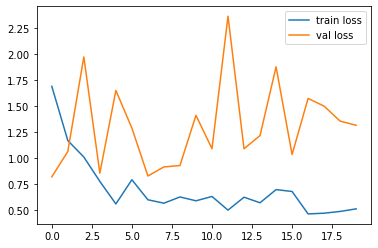

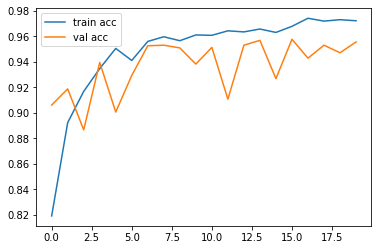

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
valid_loss, valid_acc = model.evaluate(valid_set, steps=len(valid_set))
print(f"Final validation accuracy: {valid_acc*100:.2f}%")

74/74 [==============================] - 244s 3s/step - loss: 1.3151 - accuracy: 0.9556
Final validation accuracy: 95.56%


In [ ]:
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f"Final test accuracy: {test_acc*100:.2f}%")

49/75 [==================>...........] - ETA: 2:41 - loss: 1.7345 - accuracy: 0.9477

In [ ]:
y_pred = model.predict(test_set)